# Churn Classification
by : Hesham Asem

this is a data set which contain several features , & we need to apply classification model , to be able to detect if the person exited or not

here is the data : 

https://www.kaggle.com/mrtechnical011/classification-dataset



so let's start importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

_____

# Reading Data

then read the data file

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


what is the dimension 

In [3]:
data.shape

(10000, 14)

_____

great , what is the type of values , & is there any nulls ? 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


____

looks clean data , also alkl features even numerical or categorical , so we don't have a mized data which need conversion 

ok , how about the details of it ? 

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


____


# Unique Values 

ok we can notice that row number is just a series of number , so it'll not be helpful for training , so we'll drop it later 

also we can notice a binary values (just ones & zeros) at HasCrCard , IsActiveMember , and ofcourse the output Exited

we need to look to the unique values of each feature , and this can be easily done here 

In [6]:
for column in data.columns : 
    print('Number of unique data for {0} is {1}'.format(column , len(data[column].unique())))
    print('unique data for {0} is {1}'.format(column , data[column].unique()))
    print('=====================================')

Number of unique data for RowNumber is 10000
unique data for RowNumber is [    1     2     3 ...  9998  9999 10000]
Number of unique data for CustomerId is 10000
unique data for CustomerId is [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Number of unique data for Surname is 2932
unique data for Surname is ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Number of unique data for CreditScore is 460
unique data for CreditScore is [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 80

____

so it's clear that we'll not use ('RowNumber', 'CustomerId', 'Surname') , since they will help us with nothing in trainging the model , let's drop them 


In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname' ], axis=1, inplace=True)

now how data looks like ? 

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


we need to have another look to the unique values of features 

In [9]:
for column in data.columns : 
    print('Number of unique data for {0} is {1}'.format(column , len(data[column].unique())))
    print('unique data for {0} is {1}'.format(column , data[column].unique()))
    print('=====================================')

Number of unique data for CreditScore is 460
unique data for CreditScore is [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737

____


# Needed Functions

so before we handle the dummies values for categrocial features , let's first build an important functions that we'll need , to know the relationship & the correlations between features & each other

_____

first a function to make pie chart depend on the the value counts & their index



In [10]:
def make_pie(feature) : 
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()

then a function for making countplot using seaborn

In [11]:
def make_countplot(feature) :
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("prism", 3)) 

another one for kdeplot also using seaborn

In [12]:
def make_kdeplot(feature) : 
    sns.kdeplot(data[feature], shade=True)

also we'll need this function to divide some features into few segmentations

In [13]:
def divide_feature(feature,n):
    return round((data[feature]- data[feature].min())/n)

also for making dummies for categorical features , using LabelEncoder from sklearn

In [14]:
def make_label_encoder(original_feature , new_feature) : 
    enc  = LabelEncoder()
    enc.fit(data[original_feature])
    data[new_feature] = enc.transform(data[original_feature])
    data.drop([original_feature],axis=1, inplace=True)

also , we'll need to make standardization for each feature here

In [15]:
def make_standardization(feature) : 
    data[feature] =  (data[feature] - data[feature].mean()) / (data[feature].max() - data[feature].min())

and at last to make a classification report using its class from sklearn

In [16]:
def make_report() : 
    print(classification_report(y_test,y_pred))
    print('************************************')
    CM = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix is : \n', CM)
    print('************************************')
    sns.heatmap(CM, center = True)
    plt.show()

____

# Data Correlations

now let's use these functions . to show everything we need in features 

let's start with countplotting the output , to know how many people are exited & how many are not

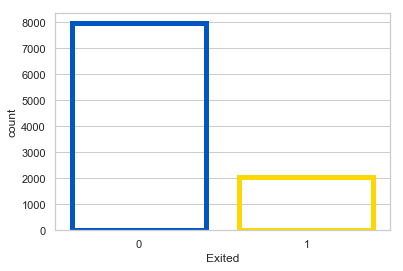

In [17]:
make_countplot("Exited")

ok , about 20 % , which is enough data for training both types

now when we move to the creditscore features , how many unique values it contain ? 

In [18]:
len(data['CreditScore'].unique())

460

it's a big a mount which will not enable us to plot it easily , since it's numerical values so we can use them in training , but we need to divide it now into segmentaion to have a look to it , let's use this function 

In [19]:
data['temp'] = divide_feature('CreditScore',100)

let's see it in the data

In [20]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,temp
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5.0


now we can know the countplot for each segmentation

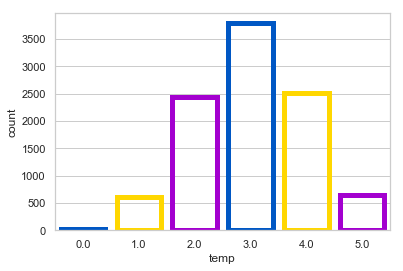

In [21]:
make_countplot('temp')

ok , majority of them in 2nd , 3rd & 4th segmentaion , now we can drop it since we'll not use it in training

In [22]:
data.drop(["temp" ], axis=1, inplace=True)

_____

how about the original country , let's have a look at it

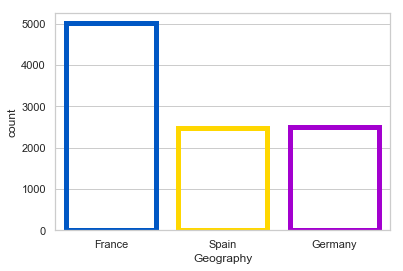

In [23]:
make_countplot("Geography")

almost 50% of people are from france & the rest are equally divided between spain & germany  , ok will pie chart graph whelp us in something ? 

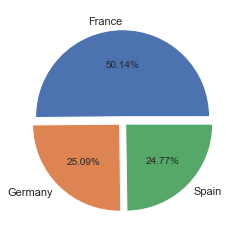

In [24]:
make_pie('Geography')

ok it gave us the same idea 

_____

how about the Gender distribution ? 

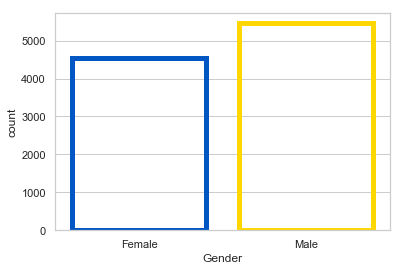

In [25]:
make_countplot("Gender")

not exactly equally divided but they are pretty close to each other 

____


now let's have a look to the Age distribution 

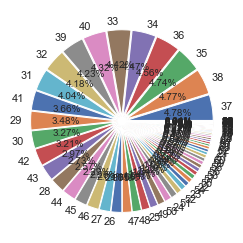

In [26]:
make_pie("Age")

Oh , since the age unique values are so much , so we'll need to divide them into segmentaions  

In [27]:
data['temp'] = divide_feature('Age',10)

now we can make the pie again

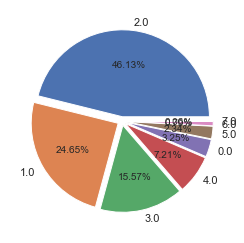

In [28]:
make_pie('temp')

which refer to us that almost 75% of people are from first 2 segmentaions , ok how about kdeplot , for the Age feature itself 

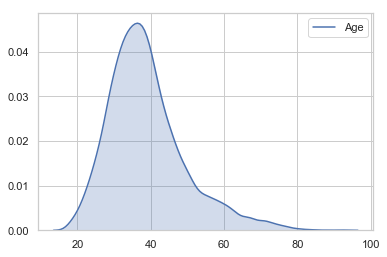

In [29]:
make_kdeplot('Age')

almost same result , majority of people from 30 to 50 , ok , let's drop the temp feature

In [30]:
data.drop(["temp" ], axis=1, inplace=True)

____

now we can have a look to Tenure feature

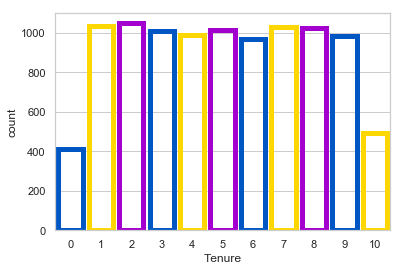

In [31]:
make_countplot("Tenure")

almost equally distributed  . . 

how about balane , let's graph it

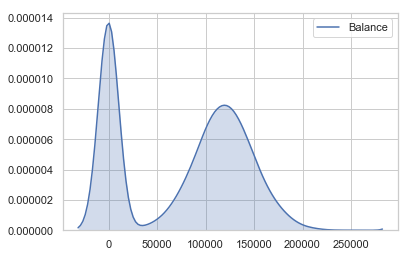

In [32]:
make_kdeplot('Balance')

majority of people either have zero balance , or between 10 & 15 thousand . 

to have an accurate look , let's divide it 

In [33]:
data['temp'] = divide_feature('Balance',10000)
print('Number of Sectors are {}'.format(len(data['temp'].unique())))

Number of Sectors are 25


25 segmentations are fine , now let's make pie chart about it 

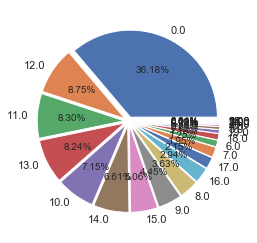

In [34]:
make_pie('temp')

kinda more clear , ok drop it 

In [35]:
data.drop(["temp" ], axis=1, inplace=True)

ow about Nomber of Products ? 

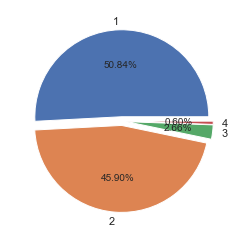

In [36]:
make_pie('NumOfProducts')

majority of it either 1 or 2 , so this data will affect in a bad way finding any product number 3 or 4 , but there is nothing to do here

___

ok, how about either he had a card or not

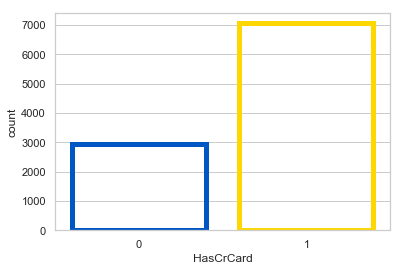

In [37]:
make_countplot('HasCrCard')

great . now if he is an active member or now

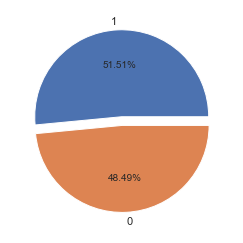

In [38]:
make_pie('IsActiveMember')

almost equl numbers 

___


how about the estimated salary , let's know its unique values

In [39]:
len(data['EstimatedSalary'].unique())

9999

since it's a big amount of unique values , we have to divide it

In [40]:
data['temp'] = divide_feature('EstimatedSalary',10000)
print('Number of Sectors are {}'.format(len(data['temp'].unique())))

Number of Sectors are 21


ok , now we can plot it easily 

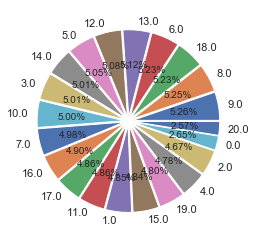

In [41]:
make_pie('temp')

kinda equally distributed , let's have a look to the kdeplot

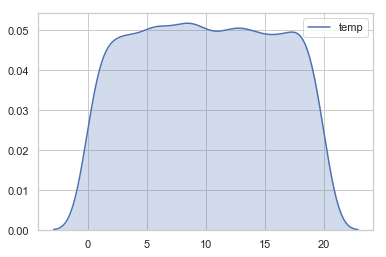

In [42]:
make_kdeplot('temp')

now let's drop it 

In [43]:
data.drop(["temp"], axis=1, inplace=True)

ok , we now finished data processing , so we can move to get dummies step

_____


# Get Dummies

first let's now what categorical features needed to convert it 

In [44]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


____

both features Geography & Gender  , so let's convert both of them into new features & frop the original features 

In [45]:
make_label_encoder('Geography' , 'Geography Code')

let's have a look

In [46]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography Code
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,2


now the gender

In [47]:
make_label_encoder('Gender' , 'Gender Code')
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography Code,Gender Code
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0



_____

# Data Standardization

ok , lets use the defined function above , to startdardize all features , except the output

In [48]:
for column in data.columns  : 
    if not column  =='Exited' :
        make_standardization(column)

how it looks now ? 

In [49]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography Code,Gender Code
0,-0.063058,0.041597,-0.30128,-0.304848,-0.176733,0.2945,0.4849,0.006294,1,-0.37315,-0.5457
1,-0.085058,0.028084,-0.40128,0.029183,-0.176733,-0.7055,0.4849,0.062268,0,0.62685,-0.5457
2,-0.297058,0.041597,0.29872,0.331509,0.489933,0.2945,-0.5151,0.069213,1,-0.37315,-0.5457
3,0.096942,0.001057,-0.40128,-0.304848,0.156600,-0.7055,-0.5151,-0.031321,0,-0.37315,-0.5457
4,0.398942,0.055111,-0.30128,0.195398,-0.176733,0.2945,0.4849,-0.105041,0,0.62685,-0.5457


____

# Data Splitting

now we are ready to define X , y data


In [50]:
X = data.drop(['Exited'], axis=1, inplace=False)
y = data['Exited']

now split it using sklearn

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (6700, 10)
X_test shape is  (3300, 10)
y_train shape is  (6700,)
y_test shape is  (3300,)


_____

# Building the Model

there are several classifier models , let's start with LogisticRegression

In [52]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=33, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  0.8102985074626866
LogisticRegressionModel Test Score is :  0.8033333333333333
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [29]
----------------------------------------------------


not very good accuracy , let's see classification report for it

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2626
           1       0.57      0.16      0.25       674

   micro avg       0.80      0.80      0.80      3300
   macro avg       0.69      0.56      0.57      3300
weighted avg       0.77      0.80      0.76      3300

************************************
Confusion Matrix is : 
 [[2543   83]
 [ 566  108]]
************************************


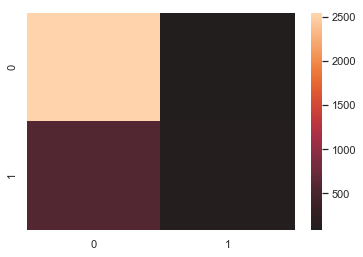

In [54]:
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
make_report()

___

how about Gaussian NB , will it helps ? 

In [55]:
GaussianNBModel = GaussianNB()
GaussianNBModel.fit(X_train, y_train)

print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(X_test, y_test))

GaussianNBModel Train Score is :  0.8283582089552238
GaussianNBModel Test Score is :  0.8242424242424242


a little better , but we might catch something best

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2626
           1       0.72      0.23      0.35       674

   micro avg       0.82      0.82      0.82      3300
   macro avg       0.77      0.60      0.62      3300
weighted avg       0.81      0.82      0.79      3300

************************************
Confusion Matrix is : 
 [[2564   62]
 [ 518  156]]
************************************


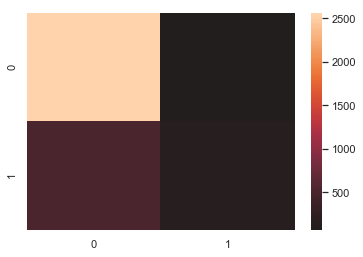

In [56]:
y_pred = GaussianNBModel.predict(X_test)
y_pred_prob = GaussianNBModel.predict_proba(X_test)
make_report()

how about Decision Tree ? 

In [57]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is :  0.8405970149253731
DecisionTreeClassifierModel Test Score is :  0.8384848484848485
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.         0.52092049 0.         0.02097101 0.27868453 0.
 0.17942397 0.         0.         0.        ]


a slightly better

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2626
           1       0.88      0.24      0.38       674

   micro avg       0.84      0.84      0.84      3300
   macro avg       0.86      0.62      0.64      3300
weighted avg       0.84      0.84      0.80      3300

************************************
Confusion Matrix is : 
 [[2603   23]
 [ 510  164]]
************************************


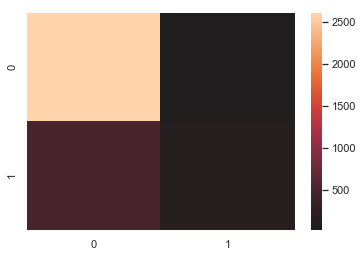

In [58]:
y_pred = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)

make_report()

___

now let's check SVC

In [59]:
SVCModel = SVC(kernel= 'sigmoid',# it can be also linear,poly,sigmoid,precomputed
               max_iter=1000,C=0.5,gamma='auto')
SVCModel.fit(X_train, y_train)

print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVCModel Train Score is :  0.4337313432835821
SVCModel Test Score is :  0.4296969696969697


oh , very far from calling it suitable , how about Random Forest ? 

In [60]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=1000,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)


RandomForestClassifierModel Train Score is :  0.8125373134328359
RandomForestClassifierModel Test Score is :  0.8081818181818182
RandomForestClassifierModel features importances are :  [1.41053968e-02 4.14482946e-01 3.86692255e-04 7.01571048e-02
 3.23818178e-01 1.39429212e-04 1.12940292e-01 1.99785774e-03
 2.79182810e-02 3.40538218e-02]



____


how about Gradient Boosting Classifier, will it be better ? 

In [61]:
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=5,random_state=33) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.9028358208955224
GBCModel Test Score is :  0.8627272727272727


Ok , better accuracy so we can focus in the model , let's check the 

In [62]:
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)

print('Predicted Value for GBCModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for GBCModel is : ' , y_pred_prob[:10])

Predicted Value for GBCModel is :  [0 0 1 0 0 0 0 0 1 0]
Prediction Probabilities Value for GBCModel is :  [[0.93773831 0.06226169]
 [0.70985056 0.29014944]
 [0.37445643 0.62554357]
 [0.96764178 0.03235822]
 [0.91805135 0.08194865]
 [0.93083061 0.06916939]
 [0.95482623 0.04517377]
 [0.50292891 0.49707109]
 [0.05055561 0.94944439]
 [0.955743   0.044257  ]]


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2626
           1       0.74      0.50      0.60       674

   micro avg       0.86      0.86      0.86      3300
   macro avg       0.81      0.73      0.76      3300
weighted avg       0.85      0.86      0.85      3300

************************************
Confusion Matrix is : 
 [[2510  116]
 [ 337  337]]
************************************


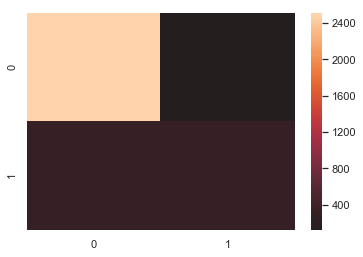

In [63]:
make_report()


____

# Using GridSearch

since we see the GBClassifier is the most suitable model , let's use GridSearch tool to look for the best parameters for it

In [64]:
SelectedModel = GradientBoostingClassifier()
SelectedParameters = {'loss':('deviance', 'exponential'), 'max_depth':[1,2,3,4,5] , 'n_estimators':[50,75,100]}

GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters,cv = 5,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

Ok , how about the accuracy ? 

In [65]:
print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

All Results are :
     mean_test_score  std_test_score  \
0          0.827015        0.009618   
1          0.848806        0.005667   
2          0.851343        0.007753   
3          0.855224        0.007806   
4          0.858358        0.005955   
5          0.858507        0.005649   
6          0.858358        0.006543   
7          0.860746        0.007630   
8          0.859851        0.007265   
9          0.860597        0.007657   
10         0.860597        0.007265   
11         0.860597        0.008117   
12         0.858806        0.007214   
13         0.857313        0.007309   
14         0.859851        0.008574   
15         0.819851        0.004995   
16         0.845224        0.005779   
17         0.848358        0.007310   
18         0.855373        0.005730   
19         0.857463        0.005980   
20         0.859403        0.006833   
21         0.858060        0.006865   
22         0.860597        0.006468   
23         0.861343        0.007513   
24    

____

ok better accuracy , let's use the best model to fit & predict the data

In [66]:
GBCModel = GridSearchModel.best_estimator_
GBCModel.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

how about the score ? 

In [67]:
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
print('GBCModel features importances are : ' , GBCModel.feature_importances_)

GBCModel Train Score is :  0.8801492537313432
GBCModel Test Score is :  0.8621212121212121
GBCModel features importances are :  [0.04257616 0.3375893  0.01342572 0.10976445 0.24658599 0.00260536
 0.10853579 0.08677519 0.0341346  0.01800744]


now let's use it to predict the test value

In [68]:
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)

print('Predicted Value for GBCModel is : ' , y_pred)
print('Prediction Probabilities Value for GBCModel is : ' , y_pred_prob)

Predicted Value for GBCModel is :  [0 0 1 ... 0 0 0]
Prediction Probabilities Value for GBCModel is :  [[0.94277593 0.05722407]
 [0.67999561 0.32000439]
 [0.41860256 0.58139744]
 ...
 [0.85732865 0.14267135]
 [0.86232302 0.13767698]
 [0.87745702 0.12254298]]


no we can insert the predicted value to X_test

In [69]:
X_test.insert(10,'Predicted Valued',y_pred)

& see the final Result

In [70]:
X_test.head(30)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography Code,Gender Code,Predicted Valued
3472,-0.113058,0.014570,0.39872,0.183067,0.156600,-0.7055,0.4849,0.454006,-0.37315,0.4543,0
5095,0.108942,0.095651,-0.00128,0.051332,-0.176733,-0.7055,0.4849,0.195378,0.62685,-0.5457,0
9504,-0.181058,0.068624,-0.00128,0.266080,-0.176733,0.2945,-0.5151,-0.007146,-0.37315,-0.5457,1
5786,-0.125058,0.014570,-0.00128,-0.304848,0.156600,-0.7055,-0.5151,0.003188,-0.37315,0.4543,0
8758,0.024942,-0.066511,0.49872,-0.304848,-0.176733,0.2945,0.4849,0.069974,-0.37315,0.4543,0
7207,-0.261058,-0.120565,-0.10128,0.273964,0.156600,-0.7055,-0.5151,0.225375,0.62685,-0.5457,0
1562,0.086942,-0.107051,0.09872,0.129801,0.156600,0.2945,0.4849,-0.403245,0.12685,0.4543,0
3578,0.106942,0.001057,-0.40128,0.191929,-0.176733,0.2945,-0.5151,0.082112,0.12685,-0.5457,1
2546,0.018942,0.149705,-0.40128,-0.304848,0.489933,0.2945,0.4849,0.458838,-0.37315,0.4543,1
6163,-0.325058,-0.147592,0.19872,0.250143,0.156600,0.2945,-0.5151,0.033549,0.12685,-0.5457,0
